# Stoneburner, Kurt
- ## DSC 540 - Week 03/04

In [1]:
# //****************************************************************************************
# //*** Set Working Directory to thinkstats folder.
# //*** This pseudo-relative path call should work on all Stoneburner localized projects. 
# //****************************************************************************************

import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#python_for_data_analysis_path = f"{os.getcwd()}\\pydata-book\\examples"

#sys.path.insert(1, python_for_data_analysis_path)
#os.chdir(python_for_data_analysis_path)


# Exercise #1
- ## Activity 05

In this acitvity, you will work with **Boston Housing Price dataset**. The Boston house-price data has been used in many machine learning papers that address regression problems. You will read the data from a CSV file into a Pandas DataFrame and do some data basic wrangling with it.

Following are the details of the attributes of this dataset for your reference. You may have to refer them while answering question on this activity.

* **CRIM**: per capita crime rate by town
* **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS**: proportion of non-retail business acres per town
* **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **NOX**: nitric oxides concentration (parts per 10 million)
* **RM**: average number of rooms per dwelling
* **AGE**: proportion of owner-occupied units built prior to 1940
* **DIS**: weighted distances to five Boston employment centres
* **RAD**: index of accessibility to radial highways
* **TAX**: full-value property-tax rate per 10,000 dollars
* **PTRATIO**: pupil-teacher ratio by town
* **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT**: % of lower status of the population
* **PRICE**: Median value of owner-occupied homes in $1000's

### Load necessary libraries

In [3]:
#//*** Ha!! Aleady loaded above as part of my generic all purpose notebook template

### Read in the Boston housing data set (given as a .csv file) from the local directory

In [4]:
#//*** Boston_housing.csv is located in Chapter05\Lesson60-68
# Hint: The Pandas function for reading a CSV file is 'read_csv'.
# Don't forget that all functions in Pandas can be accessed by syntax like pd.{function_name}
# write your code here
raw_df = pd.read_csv("z_sup_wk03_Boston_housing.csv")

### Check first 10 records

In [5]:
print(f"{raw_df.head(10)}")

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  3

### In total, how many records are there?

In [6]:
print(f"There are {len(raw_df)} records (rows) in the dataframe")

There are 506 records (rows) in the dataframe


### Create a smaller DataFrame with columns which do not include 'CHAS', 'NOX', 'B', and 'LSTAT'

In [7]:
housing_df = raw_df.drop([ 'CHAS', 'NOX', 'B', 'LSTAT'],axis=1)
print(f"{housing_df.head(5)}")


      CRIM    ZN  INDUS     RM   AGE     DIS  RAD  TAX  PTRATIO  PRICE
0  0.00632  18.0   2.31  6.575  65.2  4.0900    1  296     15.3   24.0
1  0.02731   0.0   7.07  6.421  78.9  4.9671    2  242     17.8   21.6
2  0.02729   0.0   7.07  7.185  61.1  4.9671    2  242     17.8   34.7
3  0.03237   0.0   2.18  6.998  45.8  6.0622    3  222     18.7   33.4
4  0.06905   0.0   2.18  7.147  54.2  6.0622    3  222     18.7   36.2


### Check the last 7 records of the new DataFrame you just created

In [8]:
print(f"{housing_df.tail(7)}")

        CRIM   ZN  INDUS     RM   AGE     DIS  RAD  TAX  PTRATIO  PRICE
499  0.17783  0.0   9.69  5.569  73.5  2.3999    6  391     19.2   17.5
500  0.22438  0.0   9.69  6.027  79.7  2.4982    6  391     19.2   16.8
501  0.06263  0.0  11.93  6.593  69.1  2.4786    1  273     21.0   22.4
502  0.04527  0.0  11.93  6.120  76.7  2.2875    1  273     21.0   20.6
503  0.06076  0.0  11.93  6.976  91.0  2.1675    1  273     21.0   23.9
504  0.10959  0.0  11.93  6.794  89.3  2.3889    1  273     21.0   22.0
505  0.04741  0.0  11.93  6.030  80.8  2.5050    1  273     21.0   11.9


### Can you plot histograms of all the variables (columns) in the new DataFrame?
You can of course plot them one by one. But try to write a short code to plot all of them once.
<br>***Hint***: 'For loop'!
<br>***Bonus problem***: Can you also show each plot with its unique title i.e. of the variable that it is a plot of? 

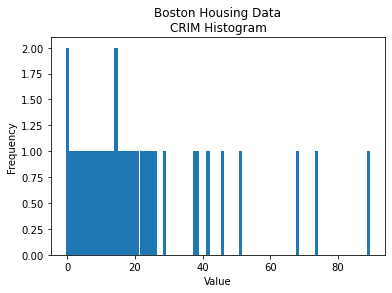

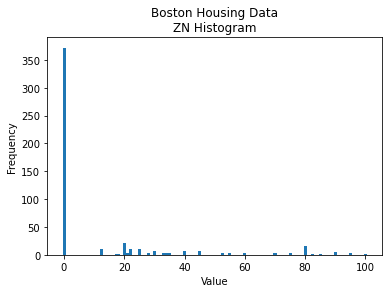

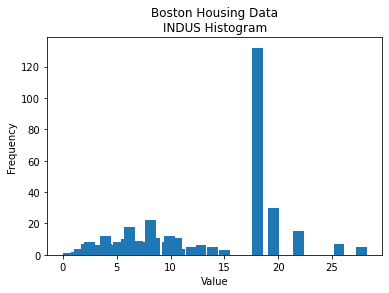

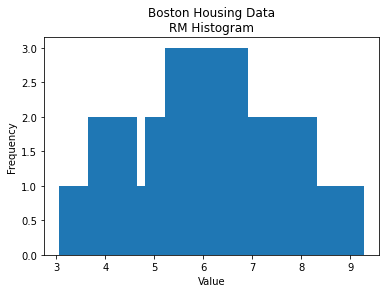

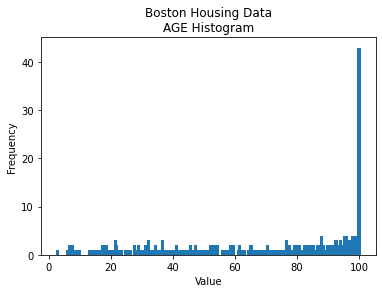

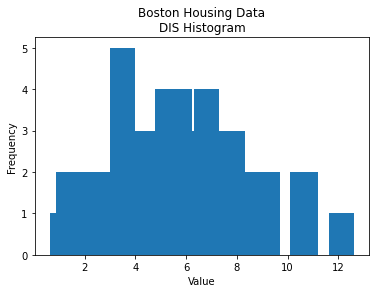

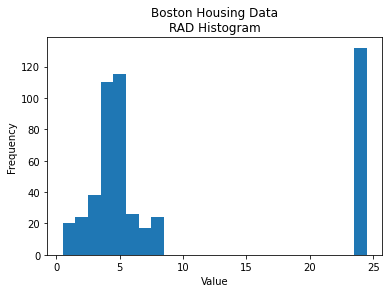

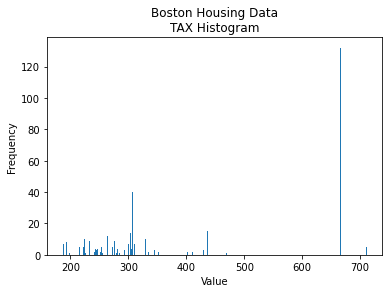

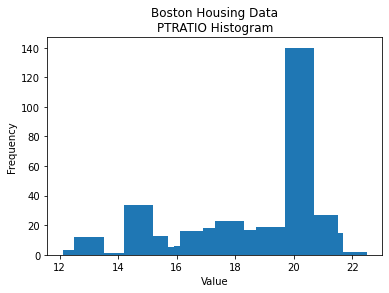

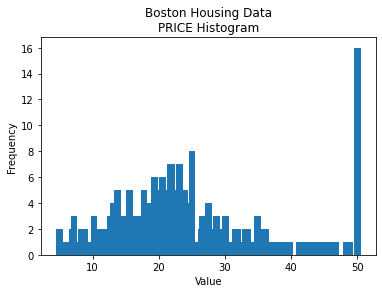

In [9]:
for loople in housing_df.items():
    #//*** A loople is a loop_tuple. I'm sacrficing good syntax on the altar of dad jokes
    column = loople[0]
    hist = loople[1].value_counts().sort_index()
    
    plt.bar(hist.index,hist,1)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title(f"Boston Housing Data\n{column} Histogram")
    plt.show()
    #print(f"{hist.index}")

### Crime rate could be an indicator of house price (people don't want to live in high-crime areas). Create a scatter plot of crime rate vs. Price.

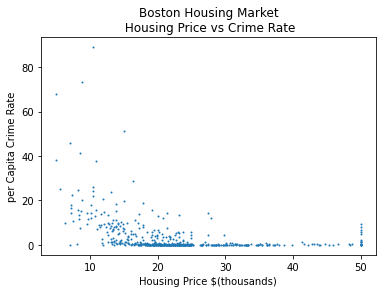

In [10]:
plt.scatter(housing_df["PRICE"],housing_df["CRIM"],1)
plt.title("Boston Housing Market\n Housing Price vs Crime Rate")
plt.xlabel("Housing Price $(thousands)")
plt.ylabel("per Capita Crime Rate")
plt

plt.show()

### We can understand the relationship better if we plot _log10(crime)_ vs. Price. Create that plot and make it nice. Give proper title, x-axis, y-axis label, make data points a color of your choice, etc...
***Hint***: Try `np.log10` function

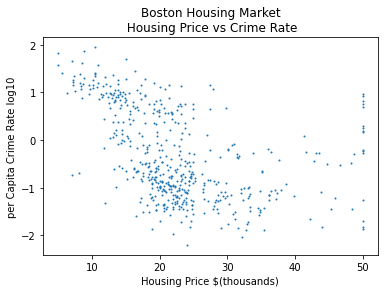

In [11]:
plt.scatter(housing_df["PRICE"],np.log10(housing_df["CRIM"]),1)
plt.title("Boston Housing Market\n Housing Price vs Crime Rate")
plt.xlabel("Housing Price $(thousands)")
plt.ylabel("per Capita Crime Rate log10")
plt

plt.show()

### Can you calculate the mean rooms per dwelling?

In [12]:
print(f"Mean Rooms per dwelling {round(housing_df['RM'].mean(),2)}")
print(f"Median Rooms per dwelling {round(housing_df['RM'].median(),2)}")

Mean Rooms per dwelling 6.28
Median Rooms per dwelling 6.21


### Can you calculate median Age?

In [13]:
print(f"Mean Proportion of Owned Dwellings {round(housing_df['AGE'].mean(),2)}%")
print(f"Median Proportion of Owned Dwellings {round(housing_df['AGE'].median(),2)}%")

Mean Proportion of Owned Dwellings 68.57%
Median Proportion of Owned Dwellings 77.5%


### Can you calculate average (mean) distances to five Boston employment centres?

In [14]:
print(f"Mean distance to five Bostom employment centers {round(housing_df['DIS'].mean(),2)} miles")

Mean distance to five Bostom employment centers 3.8 miles


### Tricky question: Can you calculate the percentage of houses with low price (< $20,000)?

In [15]:

print(f"{round(len(housing_df[housing_df['PRICE'] < 20]) / len(housing_df),4)*100}% of houses are less than $20,000")
print(f"Which is {len(housing_df[housing_df['PRICE'] < 20])} out of {len(housing_df)} houses.")

41.5% of houses are less than $20,000
Which is 210 out of 506 houses.


# Exercise #2

- ## Activity 06: Working with adult income dataset (UCI)

In this activity, you will work with **Adult Income Dataset** from UCI Machine Learning portal. The Adult Income data set has been used in many machine learning papers that address classification problems. You will read the data from a CSV file into a Pandas DataFrame and do practice some of the advanced data wrangling you learned in this Lesson.

### URL for downloading the data
We have the data downloaded as a CSV file on the disk for your ease. However, it is recommended to practice data download on your own so that you are familiar with the process.

**Here is the URL for the data set**: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

**Here is the URL for the description of the data set and the variables (at the end of the document)**: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

### Attributes/Variables

Following are the details of the type of the attributes of this dataset for your reference. You may have to refer them while answering question on this activity. Note that, many of the attributes are of discrete factor type. These are common type for a classification problem unlike continuous numeric values used for regression problems.

* __age__: continuous.
* __workclass__: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* __fnlwgt__: continuous.
* __education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* __education-num__: continuous.
* __marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* __occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* __relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* __race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* __sex__: Female, Male.
* __capital-gain__: continuous.
* __capital-loss__: continuous.
* __hours-per-week__: continuous.
* __native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### A special note on the variable 'fnlwgt':

The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.  We use 3 sets of controls. These are:
1.  A single cell estimate of the population 16+ for each state.
2.  Controls for Hispanic Origin by age and sex.
3.  Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. 

People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement.  That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

### Load necessary libraries

In [16]:
#//*** Already done!

### Read in the adult income data set (given as a .csv file) from the local directory and check first 5 records

In [17]:
#//** Had to DL from the website
filename = "z_sup_wk03_adult.data.csv"
income_df = pd.read_csv(filename)
print(f"{income_df.head(5)}")

   39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K 

### Do you think the column names (headers) make sense?

Clearly not!

### Time to read in the text file with data descriptions and extract header names
Write a file reading script which reads the text file line by line, and extracts the first phrase which is the header name

In [18]:
header_col = []
with open("z_sup_wk03_adult.names.txt","r") as fd:
    
    for rawline in fd:
        #//*** Skip Comment Lines and only process lines with a :
        if "|" not in rawline and ":" in rawline:
            header_col.append(rawline.split(':')[0])
print(header_col)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


### Add a name ("_Income_") for the response variable (last column) to the dataset and read it again with the column names supplied 

In [19]:
header_col.append("income")

In [20]:
filename = "z_sup_wk03_adult.data.csv"
income_df = pd.read_csv(filename,names=header_col)
print(f"{income_df.head()}")

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

### Show a statistical summary of the data set. Did you notice only a small number of columns are included?

In [21]:
income_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Many variables in the dataset have multiple factors or classes. Can you write a loop to count and print them?

In [22]:
def list_to_str(input_list):
    output = ""
    for x in input_list:
        output += x + ","
    return output[:-1]

#//*** Find the Categorical Columns.
#//*** These are the columns using a string data type
category_cols = []
for x in income_df.columns:
    #//*** Check if first row elemnt of each column is a string
    if isinstance((income_df[x].iloc[0]), str):
        #//*** Categorical Column Found, add it to the list
        category_cols.append(x)

#//*** Loop through Categorical Columns and grab the Uniques

for cat_col in category_cols:
    loop_col = income_df[cat_col]
    print(f"The variable [{cat_col}] has {loop_col.nunique()} elements: {list_to_str(loop_col.unique())}\n")

The variable [workclass] has 9 elements:  State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, ?, Self-emp-inc, Without-pay, Never-worked

The variable [education] has 16 elements:  Bachelors, HS-grad, 11th, Masters, 9th, Some-college, Assoc-acdm, Assoc-voc, 7th-8th, Doctorate, Prof-school, 5th-6th, 10th, 1st-4th, Preschool, 12th

The variable [marital-status] has 7 elements:  Never-married, Married-civ-spouse, Divorced, Married-spouse-absent, Separated, Married-AF-spouse, Widowed

The variable [occupation] has 15 elements:  Adm-clerical, Exec-managerial, Handlers-cleaners, Prof-specialty, Other-service, Sales, Craft-repair, Transport-moving, Farming-fishing, Machine-op-inspct, Tech-support, ?, Protective-serv, Armed-Forces, Priv-house-serv

The variable [relationship] has 6 elements:  Not-in-family, Husband, Wife, Own-child, Unmarried, Other-relative

The variable [race] has 5 elements:  White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other

The variable [sex] has 2 ele

### Is there any missing (NULL) data in the dataset? Write a single line of code to show this for all coumns

In [23]:
print(f"{income_df.isnull().sum()}")

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


### Practice subsetting: Create a DataFrame with only 
* age, 
* education,
* occupation
* race

In [24]:
subset_df = income_df[ ['age','education','occupation','race'] ]
print(subset_df)

       age    education          occupation    race
0       39    Bachelors        Adm-clerical   White
1       50    Bachelors     Exec-managerial   White
2       38      HS-grad   Handlers-cleaners   White
3       53         11th   Handlers-cleaners   Black
4       28    Bachelors      Prof-specialty   Black
...    ...          ...                 ...     ...
32556   27   Assoc-acdm        Tech-support   White
32557   40      HS-grad   Machine-op-inspct   White
32558   58      HS-grad        Adm-clerical   White
32559   22      HS-grad        Adm-clerical   White
32560   52      HS-grad     Exec-managerial   White

[32561 rows x 4 columns]


### Show the histogram of age with bin size = 20

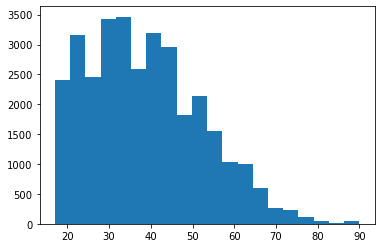

In [25]:
plt.hist(subset_df['age'],bins=20)
plt.show()

### Show boxplots of _age_ grouped by _race_ (Use a long figure size 15x6 and make _x_ ticks font size 15 )

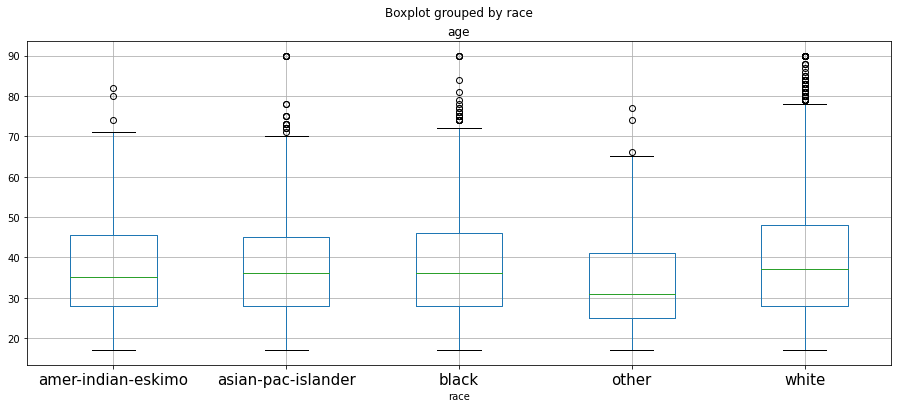

In [56]:

#plt.boxplot(data='age', group='marital-status')
subset_df.boxplot( column='age', by='race',figsize=(15,6))
plt.xticks(fontsize=15)
plt.show()

### Before doing further operation, we need to use the skill with 'apply' method we learned in this lesson. <br><br> But why? - Turns out that during reading the dataset from the CSV file, all the strings came with a whitespace character in front. So, we need to remove that whitespace from all the strings. 

### Let's write a small function to strip the whitespace character

In [27]:
#//*** Strip leading whitespace
def strip_whitespace(input_str):
    return input_str.strip()
#//*** Convert to lower case
def lower_case(input_str):
    return input_str.lower()

### Use the 'apply' method to apply this function to all the columns with string values, create a new column, copy the values from this new column to the old column, and drop the new column.

#### This is the preferred method so that you don't accidentally delete valuable data. Most of the time, create a new column with a desired operation and then copy it back to the old column if necessary.

#### IGNORE any warning messages printed.

In [28]:
#//*** Reload the CSV to ensure we have a clean instance of income_df. iPython can be sticky like that.
filename = "z_sup_wk03_adult.data.csv"
income_df = pd.read_csv(filename,names=header_col)

#//*** Strip leading Whitespace from all categorical (string type) columns
for col in income_df.columns:

    #//*** Grab a temp copy of current column as series
    loop_series = income_df[col]
    
    #//*** Check if column is a string
    if isinstance((loop_series.iloc[0]), str):
        
        #//*** Strip Whitespace 
        loop_series = loop_series.apply(strip_whitespace)
        
        #//*** Convert to lower case. It just makes things easier
        loop_series = loop_series.apply(lower_case)
        
        
        #//*** Add modified series back into the dataframe
        income_df[col] = loop_series

subset_df = income_df[ ['age','education','occupation','race'] ]        
print(f"{subset_df.head()}")

   age  education         occupation   race
0   39  bachelors       adm-clerical  white
1   50  bachelors    exec-managerial  white
2   38    hs-grad  handlers-cleaners  white
3   53       11th  handlers-cleaners  black
4   28  bachelors     prof-specialty  black


### Answer the following question using conditional filtering/boolean indexing: <br><br> _"How many black people of age between 30 and 50 (inclusive) are represented in this dataset?"_

In [57]:
# Write a code with conditional clauses and join them by & (AND) to filter the dataframe

filtered_df = subset_df[ (subset_df['race'] =="black")  & (subset_df['age'] >=30) & (subset_df['age'] <=50 ) ] 
filtered_df.head()

,age,education,occupation,race
6,49,9th,other-service,black
10,37,some-college,exec-managerial,black
13,32,assoc-acdm,sales,black
22,35,9th,farming-fishing,black
71,31,bachelors,sales,black


In [30]:
# We can look at the shape of the filtered dataframe and take the 1st element at 0 index of the tuple

number_of_rows = filtered_df.shape[0]

In [31]:
# Print out the number of black people between 30 and 50

print(f"There are {number_of_rows} individuals who racially identify as Black between the ages of 30 and 50 in the data set.")

There are 1630 individuals who racially identify as Black between the ages of 30 and 50 in the data set.


### Practice "GroupBy": Group by race and education to show how the mean age is distributed

In [32]:
subset_df.groupby(['race', 'education']).mean()

age
race               education              
amer-indian-eskimo 10th          37.250000
                   11th          31.642857
                   12th          25.400000
                   1st-4th       45.750000
                   5th-6th       39.000000
...                                    ...
white              hs-grad       39.270777
                   masters       44.338972
                   preschool     40.289474
                   prof-school   44.996109
                   some-college  35.980989

[79 rows x 1 columns]

### Group by occupation and show the summary statistics of age. Try to answer the following questions,


In [91]:
describe_df = subset_df.groupby(['occupation']).describe()['age']
print(describe_df)



                    count       mean        std   min   25%   50%   75%   max
occupation                                                                   
?                  1843.0  40.882800  20.336350  17.0  21.0  35.0  61.0  90.0
adm-clerical       3770.0  36.964456  13.362998  17.0  26.0  35.0  46.0  90.0
armed-forces          9.0  30.222222   8.089774  23.0  24.0  29.0  34.0  46.0
craft-repair       4099.0  39.031471  11.606436  17.0  30.0  38.0  47.0  90.0
exec-managerial    4066.0  42.169208  11.974548  17.0  33.0  41.0  50.0  90.0
farming-fishing     994.0  41.211268  15.070283  17.0  29.0  39.0  52.0  90.0
handlers-cleaners  1370.0  32.165693  12.372635  17.0  23.0  29.0  39.0  90.0
machine-op-inspct  2002.0  37.715285  12.068266  17.0  28.0  36.0  46.0  90.0
other-service      3295.0  34.949621  14.521508  17.0  22.0  32.0  45.0  90.0
priv-house-serv     149.0  41.724832  18.633688  17.0  24.0  40.0  57.0  81.0
prof-specialty     4140.0  40.517633  12.016676  17.0  31.0  40.

* Which profession has oldest workers on the average?

In [92]:
oldest_mean = describe_df[describe_df['mean'] == describe_df['mean'].max()].index[0]
print(f"{oldest_mean} has the highest mean age.")

exec-managerial has the highest mean age.


* Which profession has its largest share of workforce above 75th percentile?

Unknown Occupation has the highest share of the workforce above the 75th percentile, followed by Private house Services.

In [100]:
max_75 = describe_df[ describe_df['75%'] == describe_df['75%'].max() ].index[0]
print(f"{max_75} is the occupation with the highest workforce above the 75th percentile.")

? is the occupation with the highest workforce above the 75th percentile.


### Detecting outlier: Is there a particular occupation group which has very low representation? Perhaps we should remove those data because with very low data the group won't be useful in analysis

Actually, just by looking at the table above, you should be able to see that **'Armed-Forces'** group has only 9 count i.e. 9 data points. But how to detect it. Plot the count column in a bar chart.

Note, how the first argument to the barh function is the index of the dataframe which is the summary stats of the occupation groups. We see that 'Armed-Forces' group has almost no data.

#### This exercise teaches you that sometimes, outlier is not just a value but can be a whole group. The data of this group is fine but it is too small to be useful for any analysis. So it can be treated as an outlier in this case. 

#### But always use your business knowledge and engineering judgement for such outlier detection and how to process them.

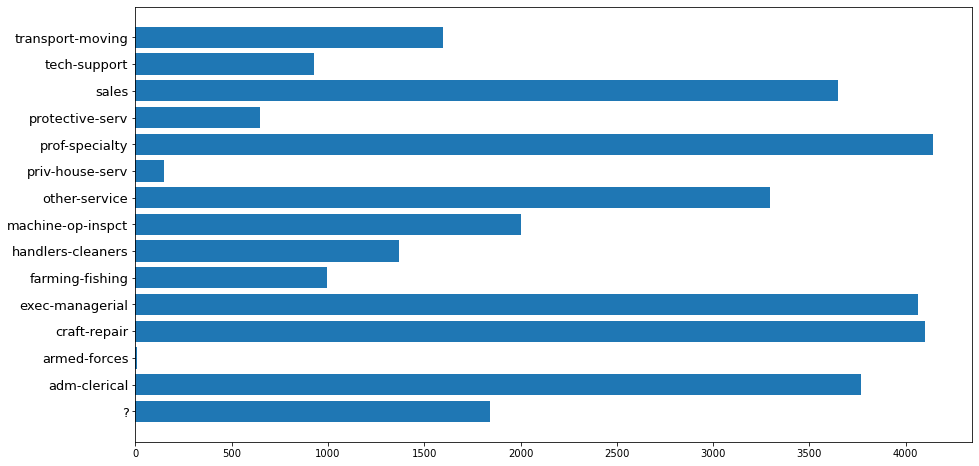

In [113]:
#//*** Been lookng for figure size for a while. This is good stuff to save for reference
plt.figure(figsize=(15,8))
plt.barh(describe_df.index, describe_df['count'])
plt.yticks(fontsize=13)
plt.show()

### Practice Merging by common keys: Suppose you are given two datasets where the common key is `occupation`. Can you merge them? 

#### First create two such disjoint datasets by taking random samples from the full dataset and then try merging. Include at least 2 other columns along with the common key column for each dataset.

#### Notice how the resulting dataset, after merging, may have more data points than either of the two starting datasets if your common key is not unique? Why is it so?

In [250]:
import random 
# Sample first dataframe with 5 elements and your chosen random_state

#//*** Chose Occupation plus three other random columns


newCols = list(income_df.columns)
newCols.remove('occupation')

newCols = [ newCols[random.randint(0,len(newCols))-1] for x in range(3)]
newCols.insert(0,'occupation')
print(newCols)

['occupation', 'marital-status', 'income', 'race']


In [37]:
# Sample second dataframe with 5 elements and your chosen random_state
# Write your code here

In [38]:
# Merge the dataframes
# Write your code here

In [39]:
# Show the merged dataframe

In [40]:
# //*** CODE HERE

In [41]:
# //*** CODE HERE

In [42]:
# //*** CODE HERE

In [43]:
# //*** CODE HERE

# Exercise #3

3. Create a series and practice basic arithmetic steps

a. Series 1 = 7.3, -2.5, 3.4, 1.5

i. Index = ‘a’, ‘c’, ‘d’, ‘e’

b. Series 2 = -2.1, 3.6, -1.5, 4, 3.1

i. Index = ‘a’, ‘c’, ‘e’, ‘f’, ‘g’

c. Add Series 1 and Series 2 together and print the results

d. Subtract Series 1 from Series 2 and print the results
